In [40]:
def preprocess_data(data):
    # Remove missing values
    data = data.dropna()

    # Calculate daily returns
    data['Return'] = data['600_Close'].pct_change()

    # Create additional features
    data['MA_50'] = data['600_Close'].rolling(window=50).mean()
    data['MA_200'] = data['600_Close'].rolling(window=200).mean()
    data['Volatility'] = data['Return'].rolling(window=50).std()

    # Split the data into training and testing sets
    train_size = int(len(data) * 0.8)
    train_data = data[:train_size]
    test_data = data[train_size:]

    return train_data.dropna(), test_data

In [41]:
import pandas as pd
data = pd.read_csv("../input/merged_data_ALL3.csv")

In [42]:
data.head()

,Date,Open,High,Low,001_SS_Close,Adj Close,Volume,399_SZ_Close,600_Close,JM0_Close,FTSE_Close,GDAXI_Close,HIS_Close,IXIC_Close
0,2023/1/3,3087.510010,3119.860107,3073.050049,3116.510010,3116.510010,281400,11117.12988,9.19,1826.5,7554.100098,14181.66992,20145.28906,10386.98047
1,2023/1/4,3117.570068,3129.090088,3109.449951,3123.520020,3123.520020,273300,11095.37012,8.90,1770.0,7585.200195,14490.78027,20793.10938,10458.75977
2,2023/1/5,3132.760010,3159.429932,3130.229980,3155.219971,3155.219971,257000,11332.00977,8.99,1791.0,7633.500000,14436.30957,21052.16992,10305.24023
3,2023/1/6,3155.070068,3170.739990,3151.840088,3157.639893,3157.639893,257400,11367.73047,9.34,1823.0,7699.500000,14610.01953,20991.64063,10569.29004
4,2023/1/9,3169.370117,3183.580078,3165.429932,3176.080078,3176.080078,258100,11450.15039,9.54,1857.5,7724.899902,14792.83008,21388.33984,10635.65039


In [43]:
train_data, test_data = preprocess_data(data)

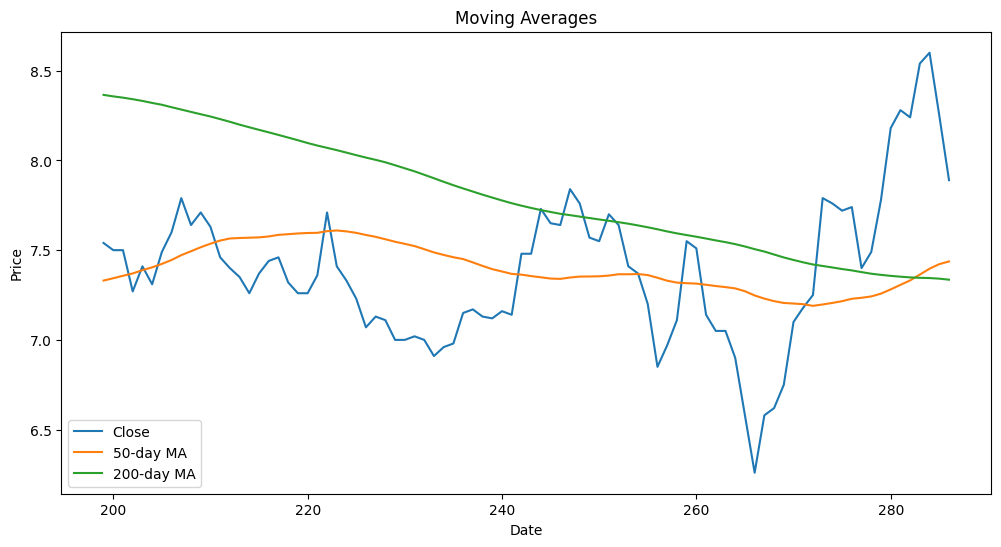

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data['600_Close'], label='Close')
plt.plot(train_data['MA_50'], label='50-day MA')
plt.plot(train_data['MA_200'], label='200-day MA')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

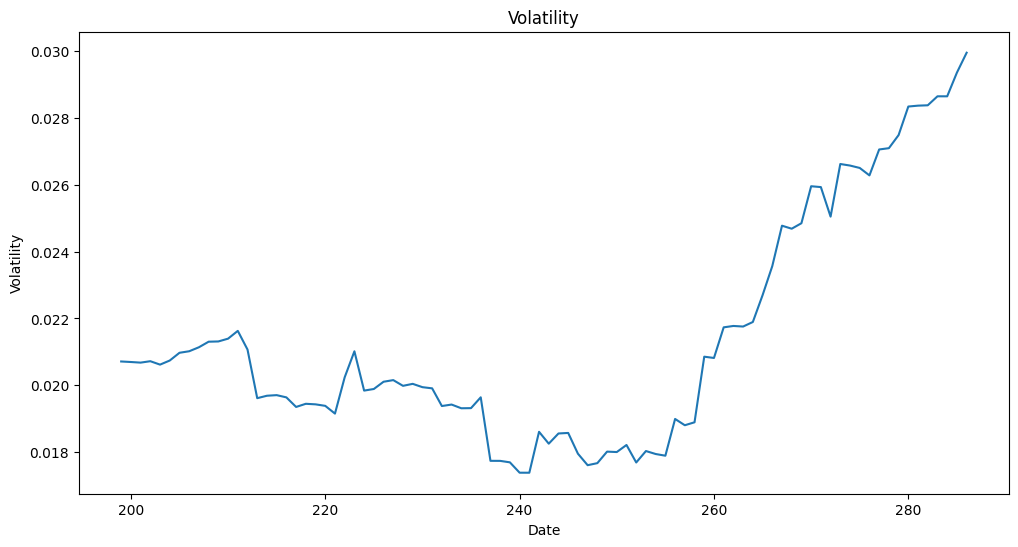

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['Volatility'])
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')

plt.show()

In [46]:
features = ['001_SS_Close', '399_SZ_Close', 'HIS_Close', 'IXIC_Close', 'FTSE_Close', 'JM0_Close','Volatility','MA_200','MA_50']
target = '600_Close'

In [47]:
import numpy as np
X_train = train_data[features].values
y_train = np.sign(train_data['Return'].values)

X_test = test_data[features].values
y_test = np.sign(test_data['Return'].values)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

C:\Users\Sirius\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    return accuracy, precision, recall, f1

In [50]:
accuracy, precision, recall, f1 = evaluate_model(logreg, X_test, y_test)
print(f"Logistic Regression: \nAccuracy={accuracy}, \nPrecision={precision}, \nRecall={recall}, \nF1-score={f1}")

accuracy, precision, recall, f1 = evaluate_model(rf, X_test, y_test)
print(f"\nRandom Forest: \nAccuracy={accuracy}, \nPrecision={precision}, \nRecall={recall}, \nF1-score={f1}\n\n")

Logistic Regression: 
Accuracy=0.5277777777777778, 
Precision=0.5172413793103449, 
Recall=0.8333333333333334, 
F1-score=0.6382978723404256

Random Forest: 
Accuracy=0.4861111111111111, 
Precision=0.47619047619047616, 
Recall=0.2777777777777778, 
F1-score=0.3508771929824561


